<a href="https://colab.research.google.com/github/gogimandu1019/bigdata202406/blob/main/7%ED%9A%8C_%EA%B8%B0%EC%B6%9C_%EC%9C%A0%ED%98%95(%EC%9E%91%EC%97%85%ED%98%952)_%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### mart 판매 데이터를 기반으로 판매액을 예측하시오.
- 제공된 데이터 목록: mart_train.csv (훈련 데이터), mart_test.csv (평가용 데이터)
- 예측할 컬럼: total (총 판매액)
학습용 데이터(mart_train.csv)를 이용하여 총 판매액을 예측하는 모델을 만든 후, 이를 평가용 데이터(mart_test.csv)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV 파일로 생성하시오.
- 제출 파일은 다음 한 개의 컬럼을 포함해야 합니다.
- pred: 예측된 총 판매액
- 제출 파일명: 'result.csv'
- 제출한 모델의 성능은 RMSE(Root Mean Square Error) 평가지표에 따라 채점한다.
- 제출 CSV 파일명 및 형태: result.csv

~~~
pred
10000
20000
30000
40000
...
~~~

### 답안 제출 참고
- pd.read_csv('result.csv') 로 제출 코드 확인

# 1. 문제정의
- RMSE
- target: total
- 예측 파일명: result.csv
- 컬럼 1개(pred)

# 2. 라이브러리 및 데이터 불러오기

In [85]:
# 데이터 불러오기
import pandas as pd
train = pd.read_csv("mart_train.csv")
test = pd.read_csv("mart_test.csv")

# 3. 탐색적 데이터 분석(EDA)

In [86]:
# 데이터 크기 확인
train.shape, test.shape #((700, 10), (300, 9))

((700, 10), (300, 9))

In [87]:
# train 샘플 확인
train.head()

,branch,city,customer_type,gender,product_line,total,payment_method,rating,time_of_day,day_name
0,A,Yangon,Member,Female,Health and beauty,823457.25,Ewallet,9.1,afternoon,Saturday
1,C,Naypyitaw,Normal,Female,Electronic accessories,120330.00,Cash,9.6,morning,Friday
2,A,Yangon,Normal,Male,Home and lifestyle,510788.25,Credit card,7.4,afternoon,Sunday
3,A,Yangon,Member,Male,Health and beauty,733572.00,Ewallet,8.4,evening,Sunday
4,A,Yangon,Normal,Male,Sports and travel,951567.75,Ewallet,5.3,morning,Friday


In [88]:
# test 샘플 확인
test.head() #예측해야 하는 값 = total, 금액은 회귀

,branch,city,customer_type,gender,product_line,payment_method,rating,time_of_day,day_name
0,C,Naypyitaw,Normal,Female,Fashion accessories,Ewallet,9.6,afternoon,Thursday
1,B,Mandalay,Normal,Male,Food and beverages,Credit card,4.3,evening,Wednesday
2,B,Mandalay,Member,Female,Fashion accessories,Credit card,5.0,evening,Wednesday
3,B,Mandalay,Member,Male,Health and beauty,Cash,9.2,morning,Sunday
4,B,Mandalay,Member,Female,Home and lifestyle,Cash,6.3,afternoon,Saturday


In [89]:
# 자료형 확인
train.info() #total, rating 빼고 모두 object
test.info() #자료형 자체는 둘다 일치

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   branch          700 non-null    object 
 1   city            700 non-null    object 
 2   customer_type   700 non-null    object 
 3   gender          700 non-null    object 
 4   product_line    700 non-null    object 
 5   total           700 non-null    float64
 6   payment_method  700 non-null    object 
 7   rating          700 non-null    float64
 8   time_of_day     700 non-null    object 
 9   day_name        700 non-null    object 
dtypes: float64(2), object(8)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   branch          300 non-null    object 
 1   city            300 non-null    object 
 2   customer_type

In [90]:
# train 기초 통계값 확인
train.describe()

,total,rating
count,7.000000e+02,700.000000
mean,4.850780e+05,7.003429
std,3.643907e+05,1.713078
min,1.904175e+04,4.000000
25%,2.001195e+05,5.500000
50%,3.818745e+05,7.000000
75%,7.061276e+05,8.425000
max,1.563975e+06,10.000000


In [92]:
# test 기초 통계값 확인
test.describe()

,rating
count,300.000000
mean,6.901000
std,1.732099
min,4.000000
25%,5.500000
50%,6.800000
75%,8.500000
max,10.000000


In [93]:
# train 기초 통계값 (Object)
train.describe(include = "O")

,branch,city,customer_type,gender,product_line,payment_method,time_of_day,day_name
count,700,700,700,700,700,700,700,700
unique,3,3,2,2,6,3,3,7
top,A,Yangon,Normal,Male,Sports and travel,Cash,evening,Saturday
freq,236,236,354,356,127,246,309,114


In [94]:
# test 기초 통계값 (Object)
test.describe(include = "O")

,branch,city,customer_type,gender,product_line,payment_method,time_of_day,day_name
count,300,300,300,300,300,300,300,300
unique,3,3,2,2,6,3,3,7
top,A,Yangon,Member,Female,Electronic accessories,Ewallet,evening,Saturday
freq,104,104,155,157,58,110,123,50


In [95]:
# train 결측치
train.isnull().sum()

branch            0
city              0
customer_type     0
gender            0
product_line      0
total             0
payment_method    0
rating            0
time_of_day       0
day_name          0
dtype: int64

In [96]:
# test 결측치
test.isnull().sum()

branch            0
city              0
customer_type     0
gender            0
product_line      0
payment_method    0
rating            0
time_of_day       0
day_name          0
dtype: int64

In [72]:
# 타겟 (value_count())
train.value_counts()

branch  city       customer_type  gender  product_line            total       payment_method  rating  time_of_day  day_name
A       Yangon     Member         Female  Electronic accessories  98406.00    Cash            4.7     evening      Monday      1
C       Naypyitaw  Member         Female  Electronic accessories  733477.50   Cash            7.6     afternoon    Sunday      1
B       Mandalay   Normal         Male    Sports and travel       541327.50   Ewallet         6.7     morning      Saturday    1
                                                                  615762.00   Ewallet         6.4     evening      Tuesday     1
                                                                  817582.50   Cash            8.2     afternoon    Saturday    1
                                                                                                                              ..
A       Yangon     Normal         Male    Sports and travel       1240627.50  Cash            6.4     

In [97]:
# target (분포)
pd.set_option ('display.float_format', '{:.10f}'.format)
train['total'].describe()

count       700.0000000000
mean     485078.0175000000
std      364390.7265411940
min       19041.7500000000
25%      200119.5000000000
50%      381874.5000000000
75%      706127.6250000000
max     1563975.0000000002
Name: total, dtype: float64

<Axes: >

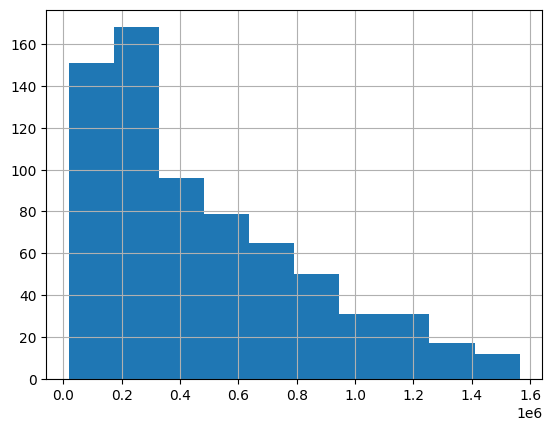

In [98]:
# target (분포, 시각화)
train['total'].hist()

# 4. 데이터 전처리

In [99]:
# target
target = train.pop('total')
train.head()

,branch,city,customer_type,gender,product_line,payment_method,rating,time_of_day,day_name
0,A,Yangon,Member,Female,Health and beauty,Ewallet,9.1000000000,afternoon,Saturday
1,C,Naypyitaw,Normal,Female,Electronic accessories,Cash,9.6000000000,morning,Friday
2,A,Yangon,Normal,Male,Home and lifestyle,Credit card,7.4000000000,afternoon,Sunday
3,A,Yangon,Member,Male,Health and beauty,Ewallet,8.4000000000,evening,Sunday
4,A,Yangon,Normal,Male,Sports and travel,Ewallet,5.3000000000,morning,Friday


In [102]:
# 원핫인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train.head()
test.head()
print(train.shape, test.shape)

(700, 30) (300, 30)


# 5. 검증 데이터 분할

In [77]:
# 검증데이터 분할
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(train, target, test_size = 0.2, random_state = 1)
x_tr.shape, x_val.shape, y_tr.shape, y_val.shape #((560, 30), (140, 30), (560,), (140,))

((560, 30), (140, 30), (560,), (140,))

# 6. 머신러닝 학습 및 평가

In [104]:
# RMSE
from sklearn.metrics import mean_squared_error
def getRmse(y_true, y_pred):
  rmse = (mean_squared_error(y_true, y_pred)) **0.5
  return rmse

In [106]:
# 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr, y_tr)
pred = lr.predict(x_val)
getRmse(y_val, pred) #355723.35800437856

355723.35800437856

In [107]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 0)
model.fit(x_tr, y_tr)
pred = model.predict(x_val)
getRmse(y_val, pred) #369960.4513508926

369960.4513508926

In [110]:
# Xgboost
import xgboost as xgb
xg = xgb.XGBRegressor(random_state = 0)
xg.fit(x_tr, y_tr)
pred = xg.predict(x_val)
getRmse(y_val, pred) #398444.4271742421

398444.4271742421

In [112]:
# LightGBM
import lightgbm as lgb
lg = lgb.LGBMRegressor(random_state = 0, verbose = -1)
lg.fit(x_tr, y_tr)
pred = lg.predict(x_val)
getRmse(y_val, pred) #397622.30202113785

397622.30202113785

# 7. 예측 및 결과 파일 생성

In [119]:
# test예측 및 csv 생성
# rmse_randomforest = getRmse(y_val, pred)
# rmse_randomforest #370055.2509148609

pred = lr.predict(test) #반드시 갯수는 테스트데이터와 동일해야 !
#pred.shape
submission = pd.DataFrame({ 'pred' : pred}).to_csv('submission.csv', index = False)

In [120]:
# result.csv 확인
pd.read_csv('submission.csv') #정수로 굳이 변환하란 말 없으면 필요 없음

,pred
0,472453.0673912948
1,491230.3466438299
2,532737.9699828350
3,388686.4823431432
4,587394.6279115472
...,...
295,518225.2405011263
296,568193.7449256367
297,541669.9329630999
298,526473.0120504524


# [심화] 성능 개선

In [ ]:
# 데이터 불러오기
import pandas as pd
train = pd.read_csv("mart_train.csv")
test = pd.read_csv("mart_test.csv")

# target 데이터


# 레이블 인코딩


# 검증데이터 분리


# 선형회귀


# 랜덤포레스트


# Xgboost


# LightGBM


# 최종 제출 파일
